**Image Restoration Model with Deep Learning (Keras) - Adejoke Adeoye**


Importing the required library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Conv2D, Conv2DTranspose
from skimage.metrics import structural_similarity as ssim
import copy
import warnings
warnings.filterwarnings("ignore")

Loading the dataset and normalizing the Images.

Normalizing the image is important as it scales the pixel values to a range of 0 to 1, a consistent and manageable range, leading to improved model training, stability, performance, and computational efficiency.

In [ ]:
# loading the Cifar 10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# normalizing the images
X_train = X_train / 255.0
X_test = X_test / 255.0

170498071/170498071 [==============================] - 4s 0us/step


This function corrupts the image by adding blocks to the images.

In [ ]:
def corrupt_data(data, max_no_blocks=100, block_size=3):

  im_size = data.shape[1:]
  data_incomplete = copy.copy(data)

  for j in range(len(data)):
    for i in range(max_no_blocks):
      xc = np.random.randint(block_size//2, im_size[0]-block_size//2)
      yc = np.random.randint(block_size//2, im_size[1]-block_size//2)

      data_incomplete[j, xc-block_size//2:xc+block_size//2,
                      yc-block_size//2:yc+block_size//2] = 0
      
  return data_incomplete

Function to implement the image restoration model in CNN

In [ ]:
def model_restore(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)
    model = Model(inputs, x)
    return model

At 10 max_no_blocks

This corrupts the images with 10 blocks and display side by side, a sample of the original and corrupted images

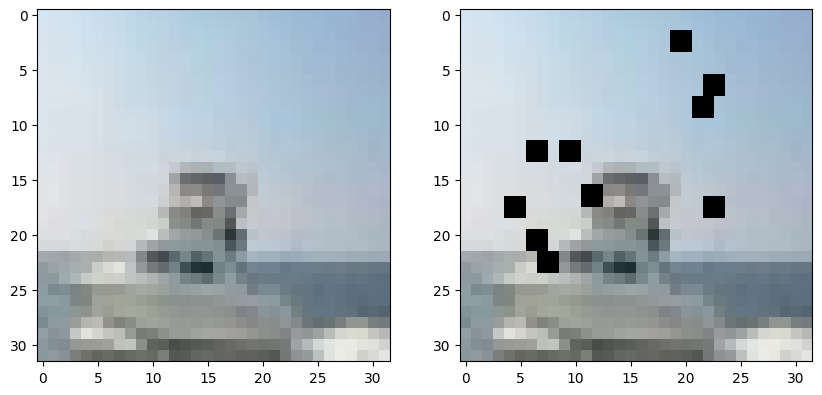

In [ ]:
max_no_blocks = 10

X_train_corrupted = corrupt_data(X_train, max_no_blocks)
X_test_corrupted = corrupt_data(X_test, max_no_blocks)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(X_train[100,], cmap=plt.cm.gray)

plt.subplot(122)
plt.imshow(X_train_corrupted[100,], cmap=plt.cm.gray)

In [ ]:
input_shape = X_train.shape[1:]
model_restore10 = model_restore(input_shape)
model_restore10.compile(optimizer='adam', loss='mse')

# training the model
model_restore10.fit(X_train_corrupted, X_train, epochs=20, batch_size=32, validation_split=0.2)

# evaluating the model
restored_images = model_restore10.predict(X_test_corrupted)

Epoch 1/20
1250/1250 [==============================] - 10s 5ms/step - loss: 0.0029 - val_loss: 5.6792e-04
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 5.0102e-04 - val_loss: 3.6751e-04
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 3.6220e-04 - val_loss: 2.9792e-04
Epoch 4/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.9991e-04 - val_loss: 2.5316e-04
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.6312e-04 - val_loss: 3.5888e-04
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.3989e-04 - val_loss: 2.2324e-04
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.2058e-04 - val_loss: 1.9830e-04
Epoch 8/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.0819e-04 - val_loss: 3.0230e-04
Epoch 9/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9787e-04 - val_loss: 2.8618e-04
Epoch 10/20
1

The below display side by side, 5 samples of the original, corrupted and restored images

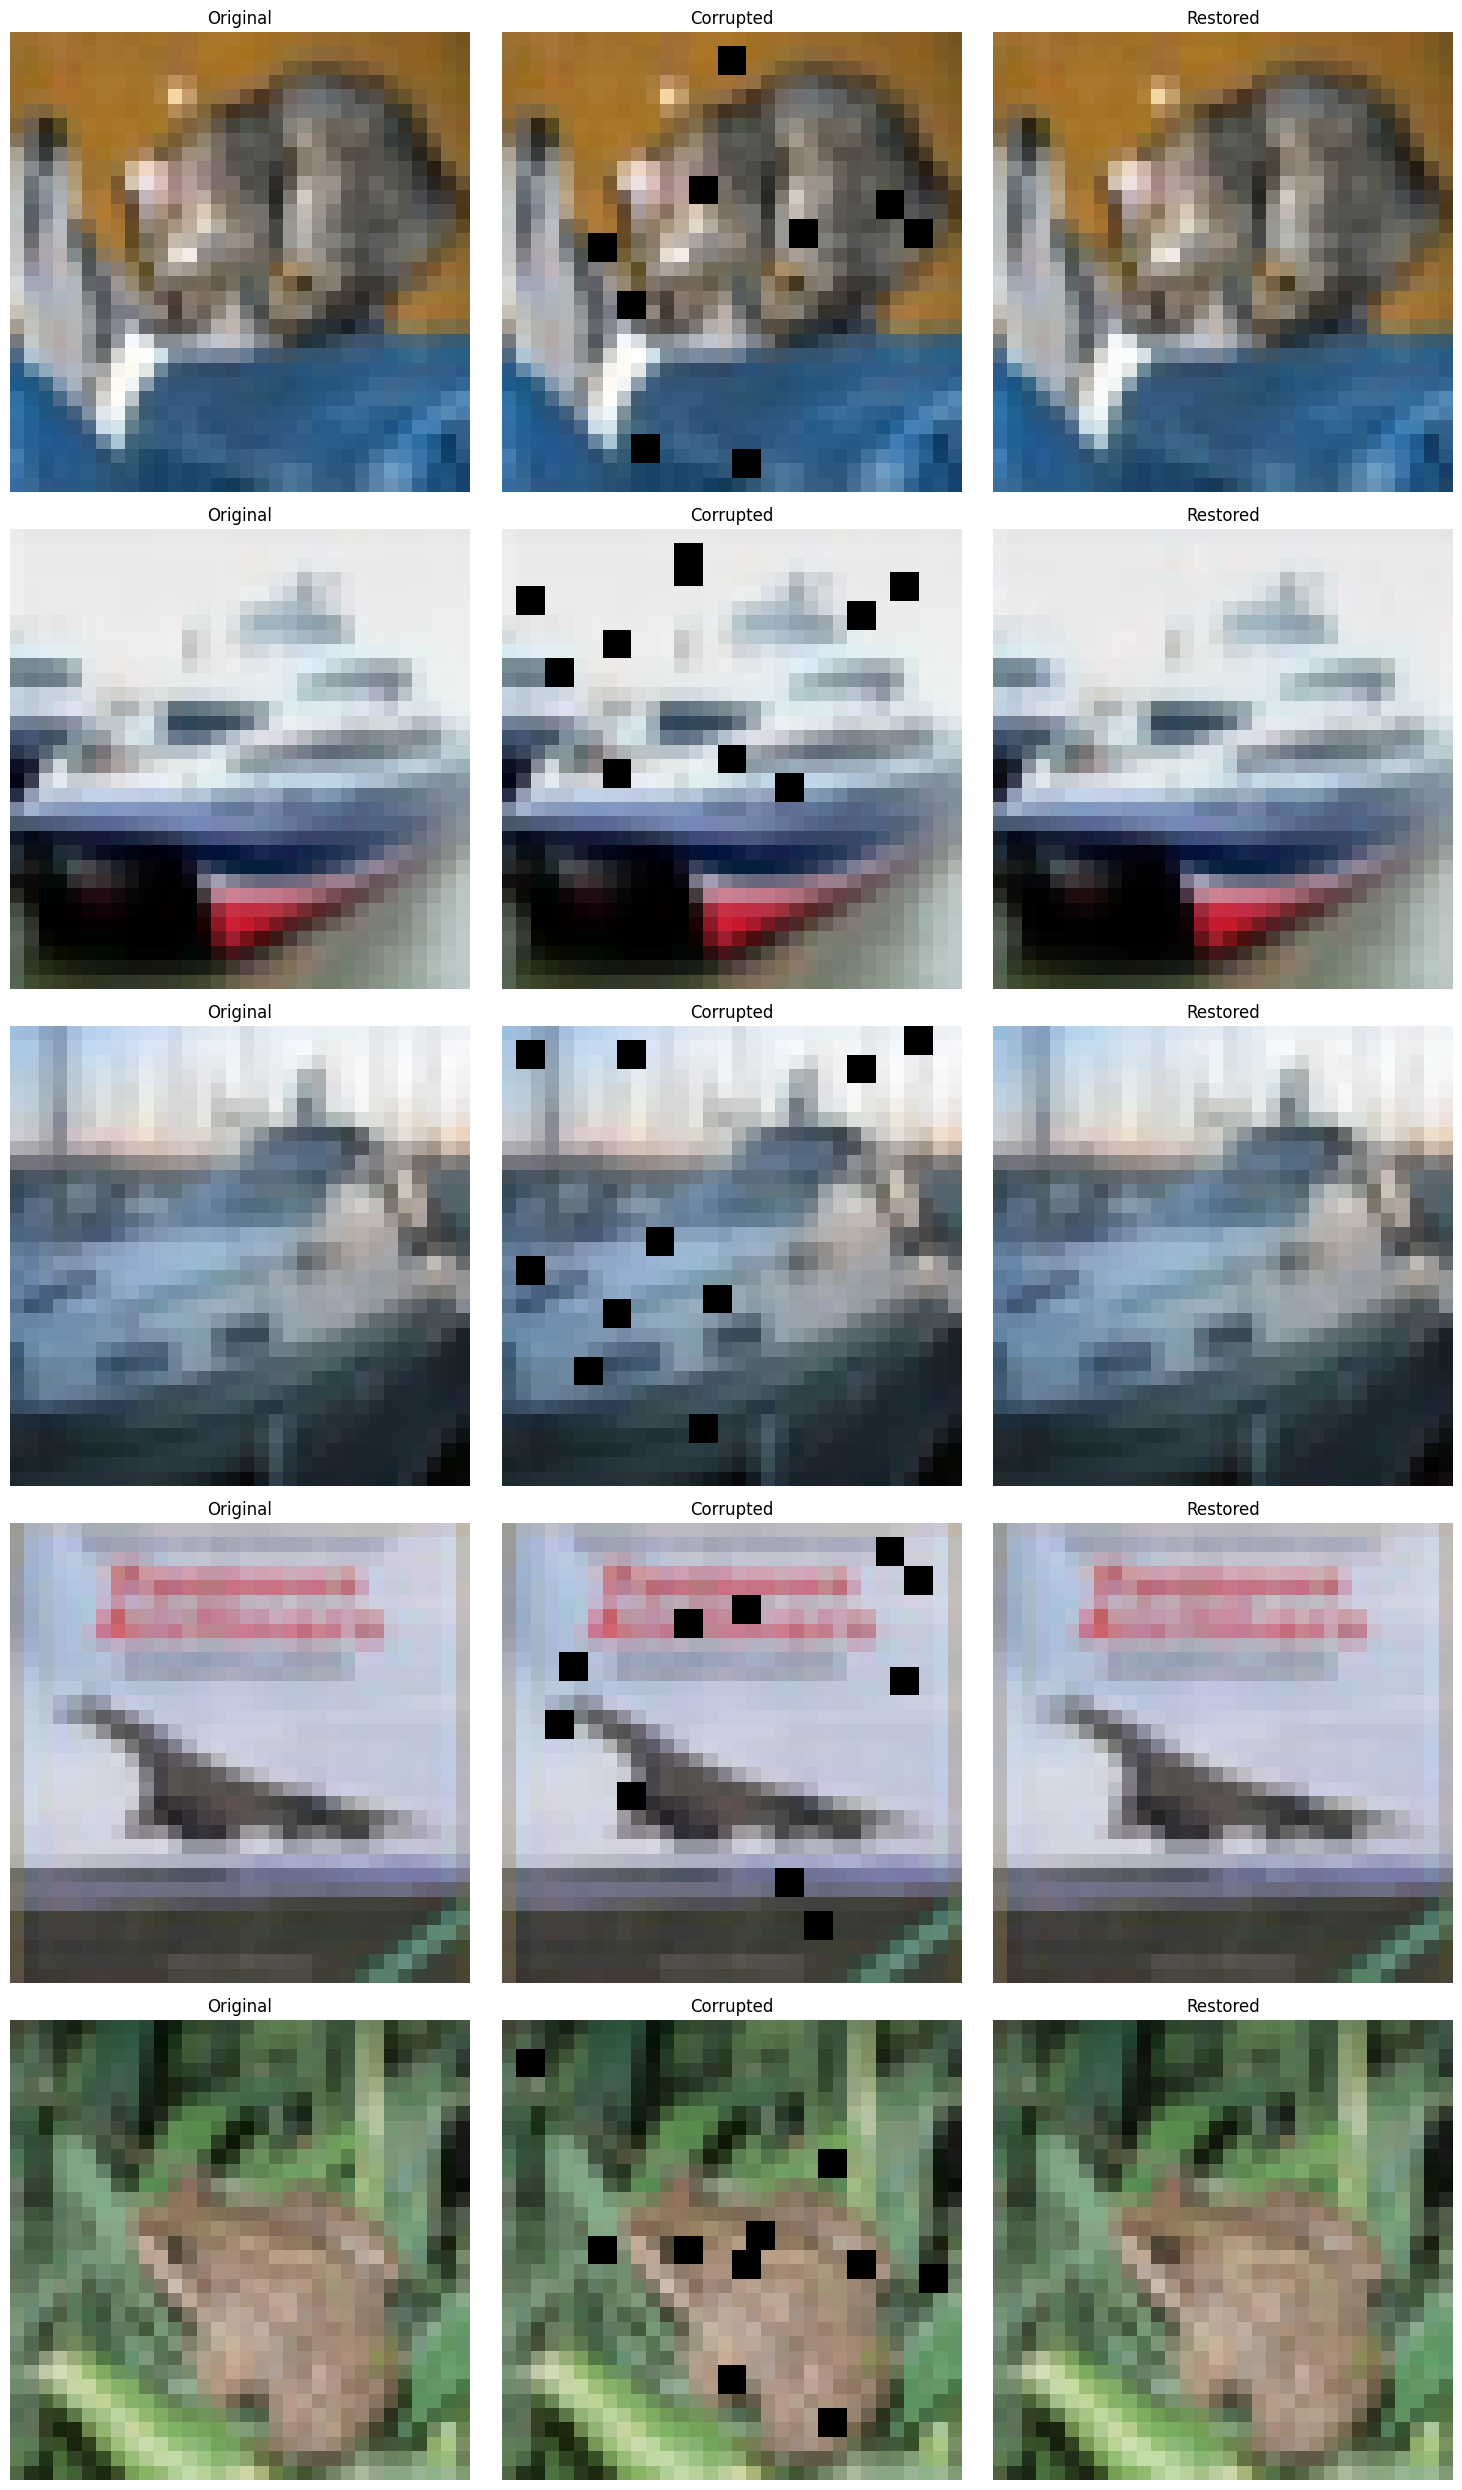

In [ ]:
# plotting five samples
n_samples = 5
plt.figure(figsize=(15, 5*n_samples))
for i in range(n_samples):
    # Original
    plt.subplot(n_samples, 3, i*3 + 1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis('off')

    # Corrupted
    plt.subplot(n_samples, 3, i*3 + 2)
    plt.imshow(X_test_corrupted[i])
    plt.title("Corrupted")
    plt.axis('off')

    # Restored
    plt.subplot(n_samples, 3, i*3 + 3)
    plt.imshow(restored_images[i])
    plt.title("Restored")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Computing the loss
loss = model_restore10.evaluate(X_test_corrupted, X_test, verbose=0)

# Computing the SSIM
ssim_values = [ssim(X_test[i], restored_images[i], multichannel=True) for i in range(len(X_test))]
avg_ssim = np.mean(ssim_values)

print("Loss:", loss)
print("Average SSIM Score:", avg_ssim)

Loss: 0.00014849301078356802
Average SSIM Score: 0.9951236423907652


The loss 0.00014849301078356802 implies that the difference between the predictions and the original image is not large even with the 10 blocks introduced. Also, the SSIM score of 0.9951236423907652 suggests that the predicted and actual images are very similar to each other.

At 50 max_no_blocks

This corrupts the images with 50 blocks and display side by side, a sample of the original and corrupted images

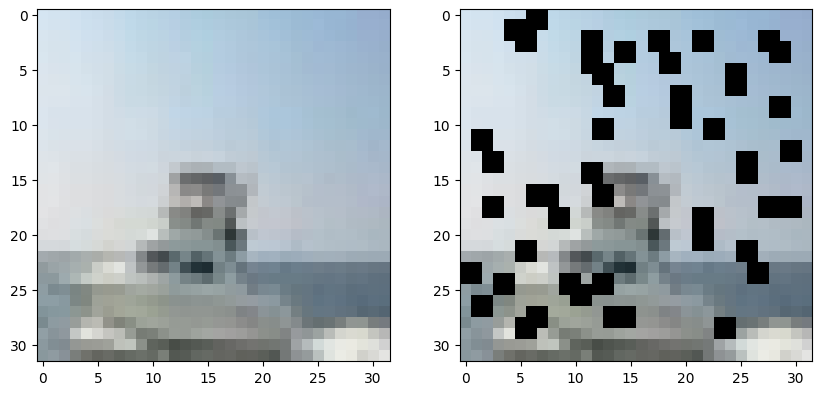

In [ ]:
max_no_blocks = 50

X_train_corrupted = corrupt_data(X_train, max_no_blocks)
X_test_corrupted = corrupt_data(X_test, max_no_blocks)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(X_train[100,], cmap=plt.cm.gray)

plt.subplot(122)
plt.imshow(X_train_corrupted[100,], cmap=plt.cm.gray)

In [ ]:
input_shape = X_train.shape[1:]
model_restore50 = model_restore(input_shape)
model_restore50.compile(optimizer='adam', loss='mse')

# training the model
model_restore50.fit(X_train_corrupted, X_train, epochs=20, batch_size=32, validation_split=0.2)

# evaluating the model
restored_images = model_restore50.predict(X_test_corrupted)

Epoch 1/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0039 - val_loss: 0.0019
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 9.5344e-04 - val_loss: 9.6669e-04
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 9.0835e-04 - val_loss: 8.4654e-04
Epoch 8/20
1250/1250 [==============================] - 6s 5ms/step - loss: 8.7090e-04 - val_loss: 8.2248e-04
Epoch 9/20
1250/1250 [==============================] - 7s 5ms/step - loss: 8.4246e-04 - val_loss: 8.0872e-04
Epoch 10/20
1250/1250 [===========================

The below display side by side, 5 samples of the original, corrupted and restored images

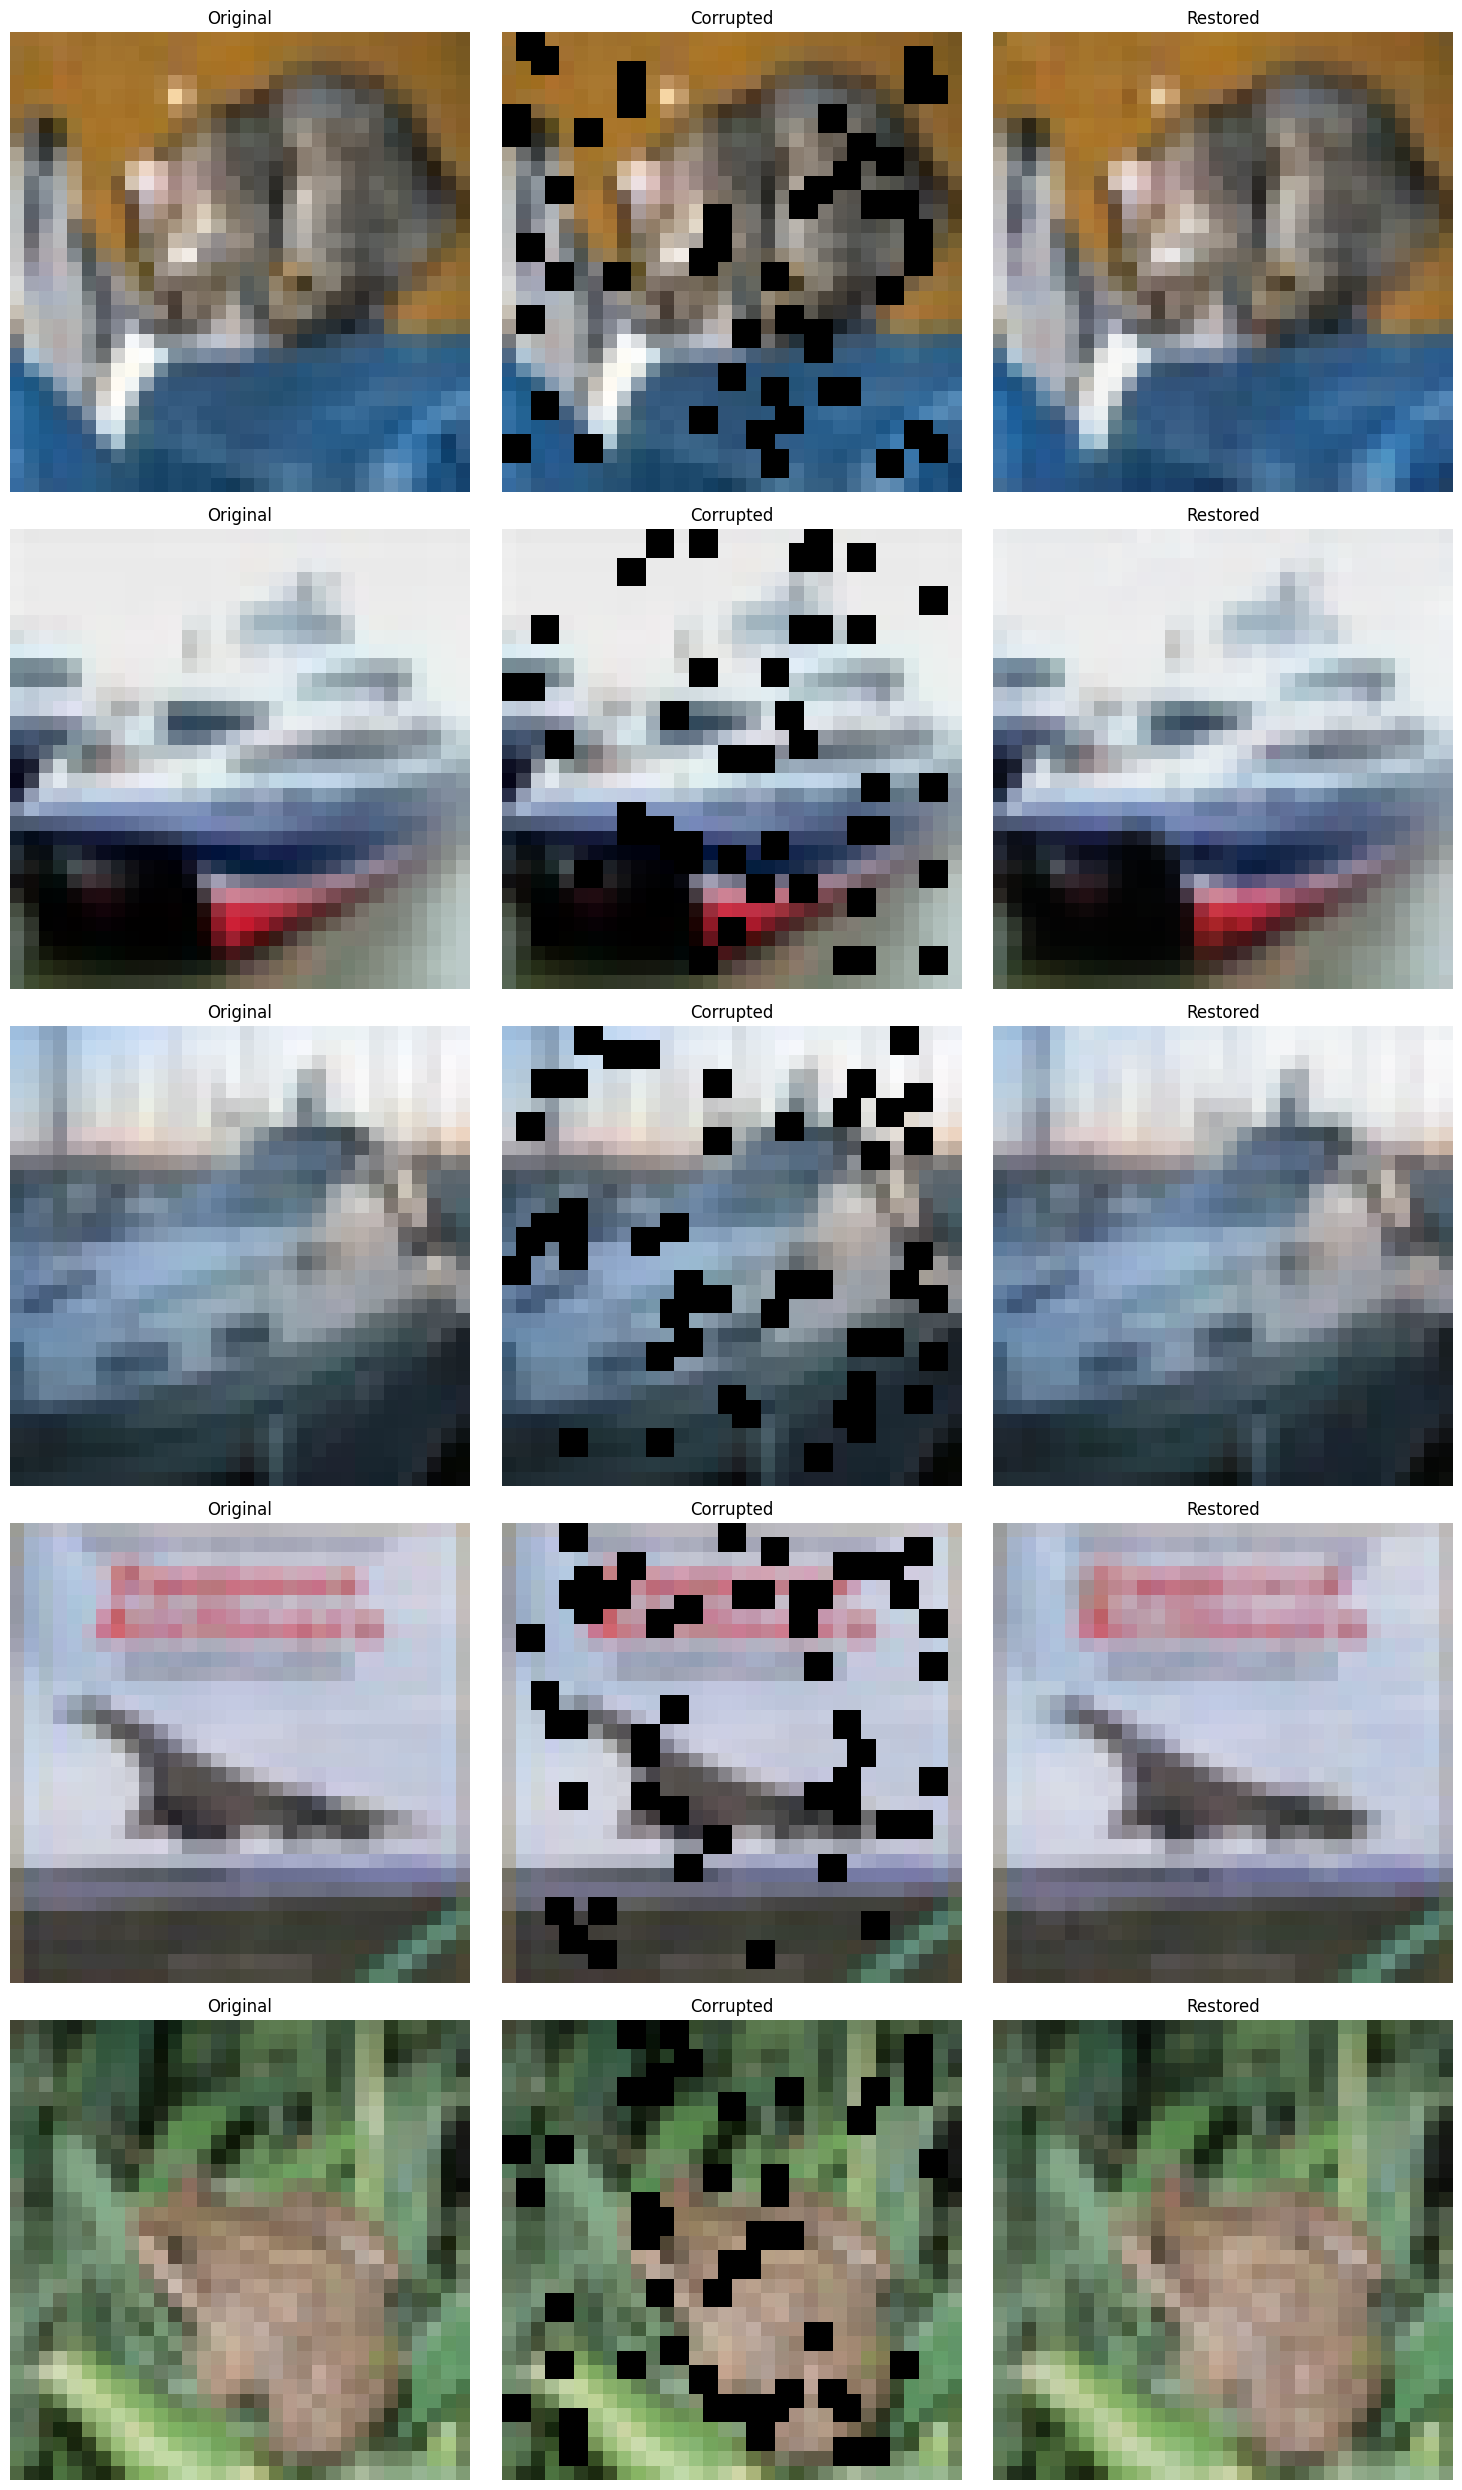

In [ ]:
# plotting five samples
n_samples = 5
plt.figure(figsize=(15, 5*n_samples))
for i in range(n_samples):
    # Original
    plt.subplot(n_samples, 3, i*3 + 1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis('off')

    # Corrupted
    plt.subplot(n_samples, 3, i*3 + 2)
    plt.imshow(X_test_corrupted[i])
    plt.title("Corrupted")
    plt.axis('off')

    # Restored
    plt.subplot(n_samples, 3, i*3 + 3)
    plt.imshow(restored_images[i])
    plt.title("Restored")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Computing the loss
loss = model_restore10.evaluate(X_test_corrupted, X_test, verbose=0)

# Computing the SSIM
ssim_values = [ssim(X_test[i], restored_images[i], multichannel=True) for i in range(len(X_test))]
avg_ssim = np.mean(ssim_values)

print("Loss:", loss)
print("Average SSIM Score:", avg_ssim)

Loss: 0.0008357324404641986
Average SSIM Score: 0.9766488547403522


The loss 0.0008357324404641986 implies that the difference between the predictions and the original image is not large even with the 50 blocks introduced. Also, the SSIM score of 0.9766488547403522 suggests that the predicted and actual images are very similar to each other.

At 100 max_no_blocks

This corrupts the images with 100 blocks and display side by side, a sample of the original and corrupted images

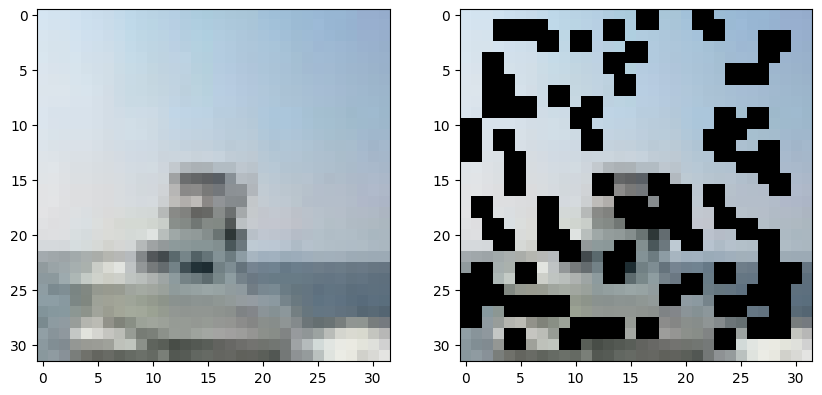

In [ ]:
max_no_blocks = 100

X_train_corrupted = corrupt_data(X_train, max_no_blocks)
X_test_corrupted = corrupt_data(X_test, max_no_blocks)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(X_train[100,], cmap=plt.cm.gray)

plt.subplot(122)
plt.imshow(X_train_corrupted[100,], cmap=plt.cm.gray)

In [ ]:
input_shape = X_train.shape[1:]
model_restore100 = model_restore(input_shape)
model_restore100.compile(optimizer='adam', loss='mse')

# training the model
model_restore100.fit(X_train_corrupted, X_train, epochs=20, batch_size=32, validation_split=0.2)

# evaluating the model
restored_images = model_restore100.predict(X_test_corrupted)

Epoch 1/20
1250/1250 [==============================] - 8s 5ms/step - loss: 0.0053 - val_loss: 0.0025
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 8/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 9/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 10/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.001

The below display side by side, 5 samples of the original, corrupted and restored images

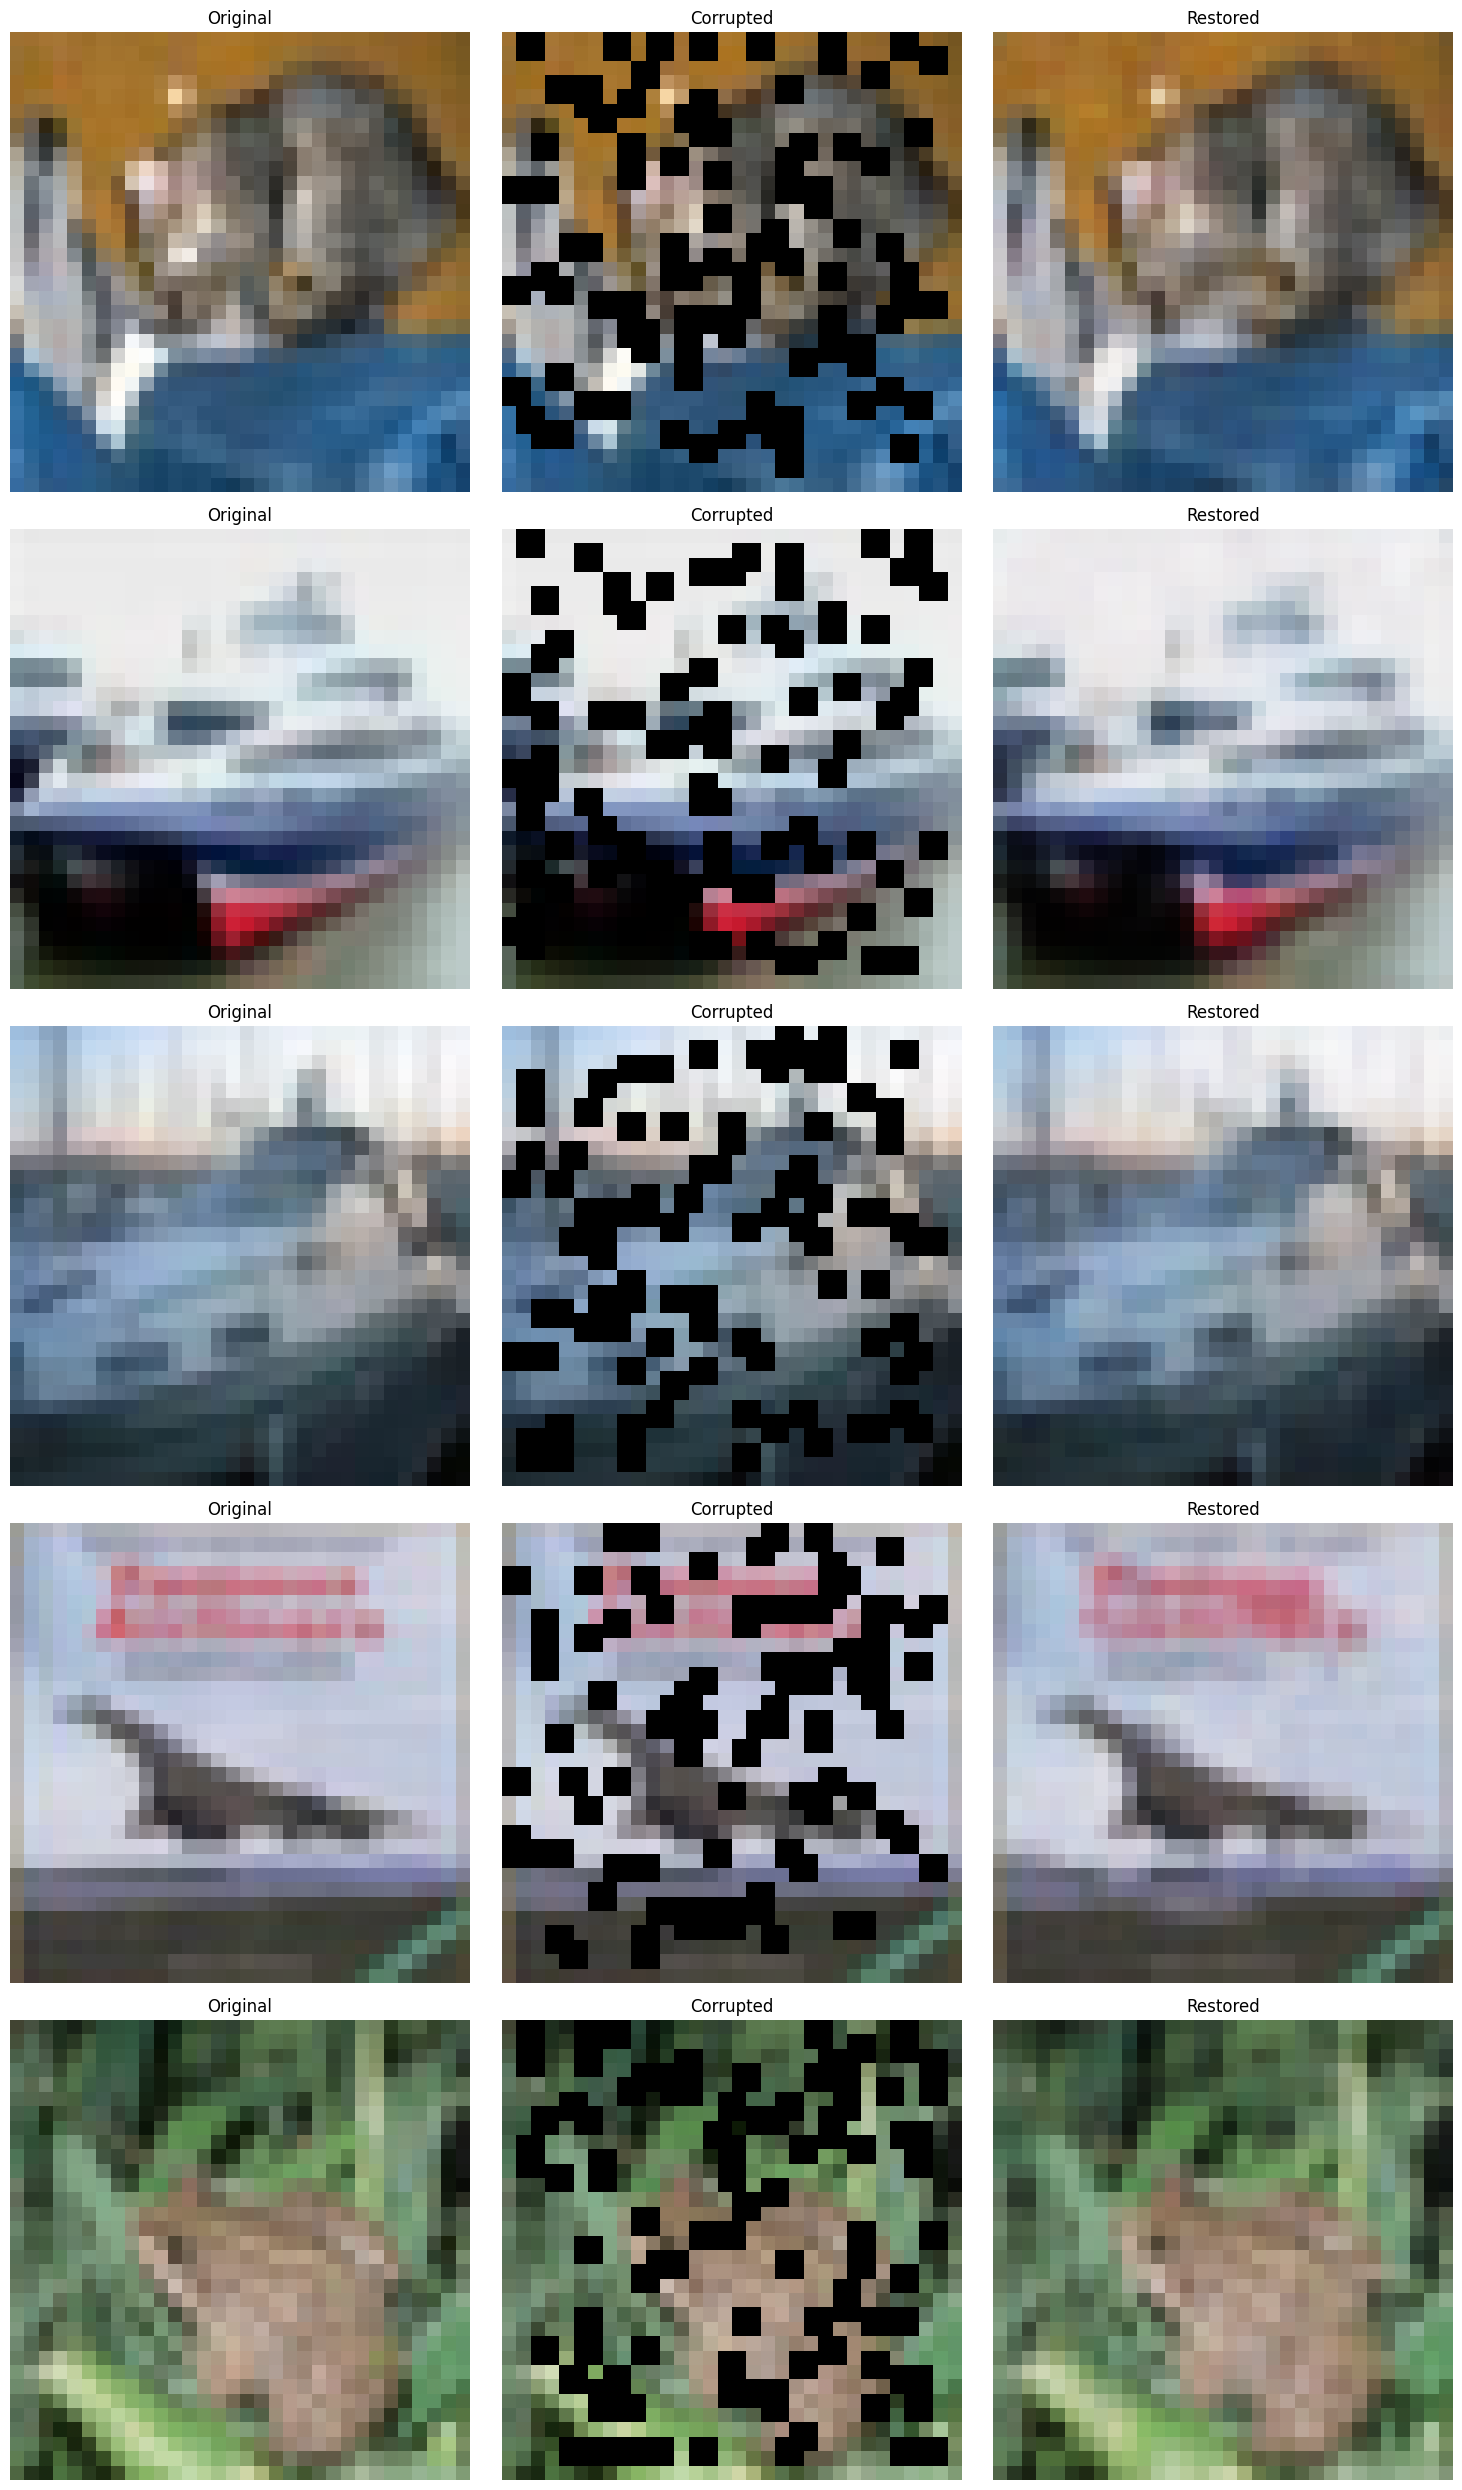

In [ ]:
# plotting five samples
n_samples = 5
plt.figure(figsize=(15, 5*n_samples))
for i in range(n_samples):
    # Original
    plt.subplot(n_samples, 3, i*3 + 1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis('off')

    # Corrupted
    plt.subplot(n_samples, 3, i*3 + 2)
    plt.imshow(X_test_corrupted[i])
    plt.title("Corrupted")
    plt.axis('off')

    # Restored
    plt.subplot(n_samples, 3, i*3 + 3)
    plt.imshow(restored_images[i])
    plt.title("Restored")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Computing the loss
loss = model_restore10.evaluate(X_test_corrupted, X_test, verbose=0)

# Computing the SSIM
ssim_values = [ssim(X_test[i], restored_images[i], multichannel=True) for i in range(len(X_test))]
avg_ssim = np.mean(ssim_values)

print("Loss:", loss)
print("Average SSIM Score:", avg_ssim)

Loss: 0.0026070885360240936
Average SSIM Score: 0.9529005617909444


 The loss describes how far off the predictions are from the original image. The loss 0.0026070885360240936 implies that the difference between the predictions and the original image is not large even with the 100 blocks introduced. Also, the SSIM score of 0.9529005617909444 suggests that the predicted and actual images are very similar to each other. This performed less accurate than the first two (10 and 50 blocks) and goes to show that the more the distortion on the image, the less the accuracy of the prediction.